![](files/images/EscUpmPolit_p.gif "UPM")

# Codigo Sergio Lopez


## Imports

In [1]:
import pandas as pd
import csv
import random
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

In [2]:
#Path where the database is
path="../../dataset/train_data_1.000.000_random_balanced.csv"

#reading the database
#df=pd.read_csv(path, delimiter='|',nrows=10000000)
df=pd.read_csv(path)
df_original=df.copy()

pd.set_option('display.max_columns', None)
df

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
0,0,0,2170687,4155,2618,8,174,68,5,22,55,26,3,22,4,290,4,102,220,4,2,4,45,8,3,2,20,12,4,20,1,-1,10,9,22,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,2,2,3
1,1,1,2114846,1847,6428,7,178,17,5,12,70,39,4,17,7,154,3,65,141,9,2,2,29,2,3,2,20,10,2,16,-1,-1,2,11,36,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,3
2,2,0,1409831,2946,4618,7,110,38,5,14,53,28,4,27,6,221,5,32,291,4,2,2,12,14,2,2,20,4,5,20,-1,-1,3,13,30,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,2,1
3,3,0,1343056,5148,6476,7,184,53,5,13,49,27,4,13,5,266,4,82,117,4,4,2,34,3,2,2,20,9,3,-1,-1,-1,2,11,29,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,2,2
4,4,1,1639771,1847,6428,7,178,17,5,16,70,39,4,17,4,207,5,104,141,9,2,2,32,2,3,2,20,14,5,12,-1,-1,2,11,36,7,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68801,68801,0,1365015,1704,2184,7,128,60,4,12,51,42,2,17,4,110,5,35,117,5,2,3,20,-1,-1,1,20,15,3,18,-1,-1,2,10,25,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,4
68802,68802,1,1815999,2389,5768,7,177,56,5,13,31,40,4,25,4,194,3,54,141,9,2,2,42,13,3,2,12,9,3,-1,-1,-1,2,12,17,6,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
68803,68803,0,1971810,1471,6236,7,156,56,5,16,58,37,4,21,4,116,3,29,141,4,2,2,38,14,3,2,14,9,3,-1,-1,-1,2,11,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,2
68804,68804,0,1479577,3251,4549,7,177,56,5,17,31,40,4,25,5,120,3,91,310,4,2,2,46,13,3,2,27,14,5,20,1,-1,2,10,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,4,4,4


# Analisis General

In [3]:
df.duplicated().any()

False

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Unnamed: 0                     0
label                          0
uid                            0
task_id                        0
adv_id                         0
creat_type_cd                  0
adv_prim_id                    0
dev_id                         0
inter_type_cd                  0
slot_id                        0
spread_app_id                  0
tags                           0
app_first_class                0
app_second_class               0
age                            0
city                           0
city_rank                      0
device_name                    0
device_size                    0
career                         0
gender                         0
net_type                       0
residence                      0
his_app_size                   0
his_on_shelf_time              0
app_score                      0
emui_dev                       0
list_time                      0
device_price                   0
up_life_duration               0
up_members

In [5]:
pd.reset_option('display.max_rows')

In [6]:
df_original = df.copy()
df_clean = df.dropna()
print("Original", df.shape)
print("Cleaned", df_clean.shape)

Original (68806, 64)
Cleaned (68806, 64)


In [7]:
df.describe()

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
count,68806.000000,68806.000000,6.880600e+04,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.00000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000,68806.000000
mean,34402.500000,0.500000,1.618932e+06,3412.282984,3948.131268,6.460658,162.530114,40.631413,4.721928,14.857789,51.179476,35.120513,3.651397,21.996076,4.896622,265.612432,3.807430,62.581882,159.310889,6.444700,2.443421,2.196582,28.471049,6.620353,2.150961,1.829913,19.060358,9.300642,3.343982,12.187237,-0.774627,-0.969974,2.565212,11.013226,25.986949,2.476862,0.016656,0.254469,0.34356,0.960759,0.965628,0.969334,0.971689,0.973825,0.975525,0.977008,0.978389,0.979856,0.980903,0.417246,0.981615,0.981949,0.981789,0.980496,0.463840,0.511961,0.612563,0.802575,0.896332,0.936706,0.953405,0.555606,1.686379,2.371697
std,19862.725648,0.500004,3.579782e+05,1419.656020,1701.315892,1.307483,31.628104,17.832573,0.615601,3.131063,26.248399,7.688294,0.753090,3.467655,1.789576,100.970674,0.910727,24.962182,45.834342,2.485148,0.818357,0.416348,10.640812,5.577276,1.472698,0.375712,4.429188,3.687094,1.237560,9.154840,0.635689,0.748420,1.738107,1.914919,10.760465,2.073606,0.127978,0.435566,0.47490,0.194169,0.182184,0.172412,0.165862,0.159657,0.154518,0.149880,0.145412,0.140492,0.136868,0.493108,0.134340,0.133136,0.133713,0.138289,0.498694,0.499861,0.487168,0.398058,0.304832,0.243493,0.210771,1.011989,1.295873,1.011085
min,0.000000,0.000000,1.000007e+06,1001.000000,1004.000000,2.000000,101.000000,11.000000,2.000000,11.000000,11.000000,11.000000,2.000000,11.000000,-1.000000,101.000000,2.000000,12.000000,103.000000,2.000000,2.000000,2.000000,11.000000,-1.000000,-1.000000,1.000000,11.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,11.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17201.250000,0.000000,1.307444e+06,2221.000000,2504.000000,7.000000,142.000000,27.000000,5.000000,12.000000,28.000000,37.000000,4.000000,21.000000,4.000000,193.000000,3.000000,41.000000,141.000000,4.000000,2.000000,2.000000,20.000000,4.000000,2.000000,2.000000,14.000000,7.000000,2.000000,-1.000000,-1.000000,-1.000000,2.000000,10.000000,17.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,34402.500000,0.500000,1.618586e+06,3357.000000,4007.000000,7.000000,156.000000,37.000000,5.000000,14.000000,50.000000,37.000000,4.000000,21.000000,5.000000,261.000000,4.000000,58.000000,1

In [8]:
df.dtypes

Unnamed: 0            int64
label                 int64
uid                   int64
task_id               int64
adv_id                int64
                      ...  
8                     int64
9                     int64
device_size_binned    int64
emui_dev_binned       int64
list_time_binned      int64
Length: 64, dtype: object

In [9]:
c = df.corr().abs()["label"][:]
so = c.sort_values(kind="quicksort")
so.tail(20)

task_id              0.062133
19                   0.062651
20                   0.063289
21                   0.064189
22                   0.064672
up_life_duration     0.068780
tags                 0.082284
indu_name            0.083609
slot_id              0.083937
adv_prim_id          0.092974
career               0.092975
adv_id               0.103296
dev_id               0.121304
device_price         0.128548
age                  0.129381
app_score            0.129395
app_first_class      0.136442
his_on_shelf_time    0.164345
pt_d                 0.712225
label                1.000000
Name: label, dtype: float64

In [10]:
for column in df:
    print(column )
    print(len(df[column].unique()))

Unnamed: 0
68806
label
2
uid
64655
task_id
2577
adv_id
2713
creat_type_cd
8
adv_prim_id
100
dev_id
54
inter_type_cd
4
slot_id
12
spread_app_id
68
tags
29
app_first_class
3
app_second_class
19
age
8
city
342
city_rank
4
device_name
81
device_size
99
career
9
gender
3
net_type
5
residence
34
his_app_size
21
his_on_shelf_time
4
app_score
2
emui_dev
14
list_time
16
device_price
7
up_life_duration
21
up_membership_grade
4
membership_life_duration
5
consume_purchase
9
communication_avgonline_30d
14
indu_name
37
pt_d
7
-1
2
0
2
1
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
2
2
20
2
21
2
22
2
23
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
device_size_binned
5
emui_dev_binned
5
list_time_binned
5


In [11]:
df

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
0,0,0,2170687,4155,2618,8,174,68,5,22,55,26,3,22,4,290,4,102,220,4,2,4,45,8,3,2,20,12,4,20,1,-1,10,9,22,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,2,2,3
1,1,1,2114846,1847,6428,7,178,17,5,12,70,39,4,17,7,154,3,65,141,9,2,2,29,2,3,2,20,10,2,16,-1,-1,2,11,36,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,3
2,2,0,1409831,2946,4618,7,110,38,5,14,53,28,4,27,6,221,5,32,291,4,2,2,12,14,2,2,20,4,5,20,-1,-1,3,13,30,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,2,1
3,3,0,1343056,5148,6476,7,184,53,5,13,49,27,4,13,5,266,4,82,117,4,4,2,34,3,2,2,20,9,3,-1,-1,-1,2,11,29,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,2,2
4,4,1,1639771,1847,6428,7,178,17,5,16,70,39,4,17,4,207,5,104,141,9,2,2,32,2,3,2,20,14,5,12,-1,-1,2,11,36,7,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68801,68801,0,1365015,1704,2184,7,128,60,4,12,51,42,2,17,4,110,5,35,117,5,2,3,20,-1,-1,1,20,15,3,18,-1,-1,2,10,25,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,4
68802,68802,1,1815999,2389,5768,7,177,56,5,13,31,40,4,25,4,194,3,54,141,9,2,2,42,13,3,2,12,9,3,-1,-1,-1,2,12,17,6,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
68803,68803,0,1971810,1471,6236,7,156,56,5,16,58,37,4,21,4,116,3,29,141,4,2,2,38,14,3,2,14,9,3,-1,-1,-1,2,11,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,2
68804,68804,0,1479577,3251,4549,7,177,56,5,17,31,40,4,25,5,120,3,91,310,4,2,2,46,13,3,2,27,14,5,20,1,-1,2,10,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,4,4,4


# Label

In [12]:
#distribution
df.groupby('label').size()

label
0    34403
1    34403
dtype: int64

In [13]:
df.groupby('label').mean()

,Unnamed: 0,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34452.355667,1.617165e+06,3324.075459,3772.392698,6.410022,159.589542,42.794553,4.702584,15.120600,52.171032,34.487893,3.548644,22.183850,4.665087,264.844490,3.856699,62.543150,158.169171,6.213644,2.422463,2.212743,28.458158,6.309915,1.908932,1.781298,19.190652,9.141383,3.503067,12.816906,-0.745458,-0.968811,2.604860,11.131907,26.886609,1.000000,0.008749,0.266111,0.357265,0.970526,0.975380,0.978694,0.980845,0.983112,0.984827,0.986309,0.987298,0.988431,0.989478,0.430951,0.990117,0.990495,0.990437,0.988984,0.476325,0.520536,0.615818,0.804232,0.904136,0.947388,0.963521,0.526989,1.730082,2.323460
1,34352.644333,1.620700e+06,3500.490510,4123.869837,6.511293,165.470686,38.468273,4.741273,14.594977,50.187920,35.753132,3.754149,21.808302,5.128157,266.380374,3.758161,62.620614,160.452606,6.675755,2.464378,2.180420,28.483940,6.930791,2.392989,1.878528,18.930064,9.459902,3.184897,11.557568,-0.803796,-0.971136,2.525565,10.894544,25.087289,3.953725,0.024562,0.242828,0.329855,0.950993,0.955876,0.959974,0.962532,0.964538,0.966224,0.967706,0.969479,0.971282,0.972328,0.403540,0.973113,0.973403,0.973142,0.972008,0.451356,0.503386,0.609307,0.800919,0.888527,0.926024,0.943290,0.584222,1.642677,2.419934


In [14]:
df['label'].unique()

array([0, 1], dtype=int64)

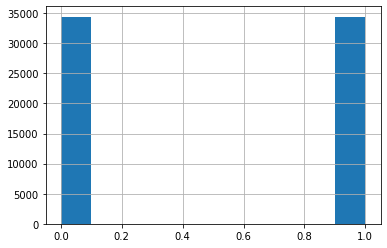

In [15]:
# Analise distributon
df['label'].hist()
plt.show()

# creat_type_cd

Tipo creativo del anuncio. Hay 8 tipos. Lo más destacable es que cuando es del tipo 7, tiende a ser label 1.

In [16]:
column='creat_type_cd'

In [17]:
#distribution
df.groupby(column).size()

creat_type_cd
2      334
3     6499
4     1102
5      973
6     7614
7    49091
8     2964
9      229
dtype: int64

In [18]:
df[column].unique()

array([8, 7, 6, 3, 4, 9, 5, 2], dtype=int64)

In [19]:
df.corr().abs()["label"][column]

0.03872744671433442

In [20]:
df.groupby(column)["label"].mean()

creat_type_cd
2    0.511976
3    0.456686
4    0.228675
5    0.413155
6    0.482401
7    0.527103
8    0.328947
9    0.375546
Name: label, dtype: float64

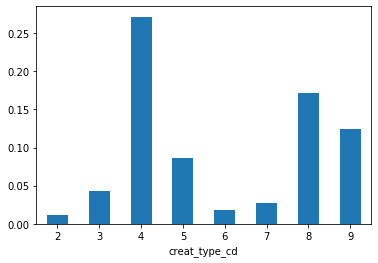

In [21]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [22]:
df.groupby(column)['label'].sum()

creat_type_cd
2      171
3     2968
4      252
5      402
6     3673
7    25876
8      975
9       86
Name: label, dtype: int64

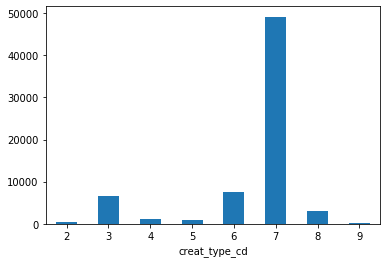

In [23]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9C4B55C8>,
      dtype=object)

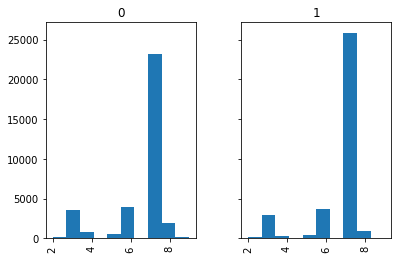

In [24]:
df.hist(column=column, by='label', sharey=True)

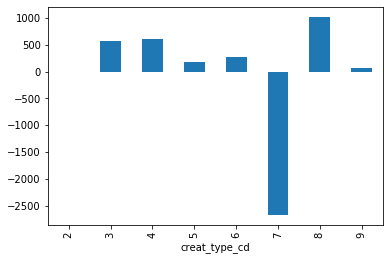

In [25]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

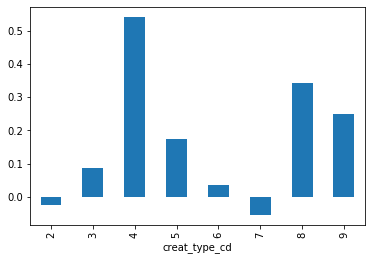

In [27]:
((df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size())
/df.groupby(column).size()).plot(kind='bar')

# slot_id

In [28]:
column='slot_id'

In [29]:
#distribution
df.groupby(column).size()

slot_id
11     5576
12    22741
13     3950
14     3001
15     1046
16     6518
17    13877
18     4600
19     1336
20      124
21     4652
22     1385
dtype: int64

In [30]:
df[column].unique()

array([22, 12, 14, 13, 16, 21, 15, 17, 11, 18, 19, 20], dtype=int64)

In [31]:
df.corr().abs()["label"][column]

0.08393741256181136

In [32]:
df.groupby(column)["label"].mean()

slot_id
11    0.407819
12    0.627501
13    0.442532
14    0.335555
15    0.386233
16    0.425898
17    0.440153
18    0.518913
19    0.340569
20    0.508065
21    0.470765
22    0.520578
Name: label, dtype: float64

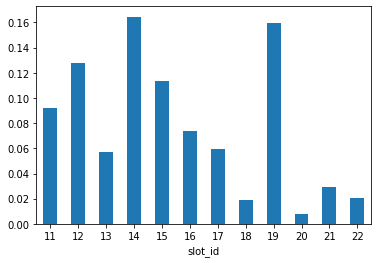

In [33]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [34]:
df.groupby(column)['label'].sum()

slot_id
11     2274
12    14270
13     1748
14     1007
15      404
16     2776
17     6108
18     2387
19      455
20       63
21     2190
22      721
Name: label, dtype: int64

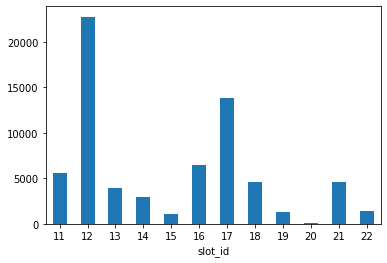

In [35]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9C753988>,
      dtype=object)

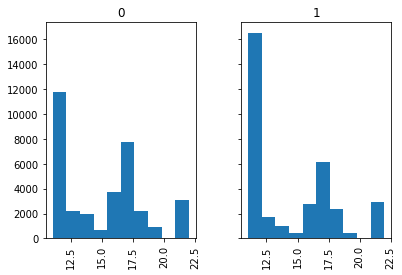

In [36]:
df.hist(column=column, by='label', sharey=True)

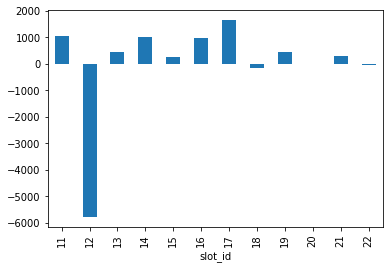

In [37]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# spread_app_id

In [38]:
column='spread_app_id'

In [39]:
#distribution
df.groupby(column).size()

spread_app_id
11    2576
12     622
13    9051
14      10
15     171
      ... 
85      22
86    5453
87      65
88    2735
89       7
Length: 68, dtype: int64

In [40]:
df[column].unique()

array([55, 70, 53, 49, 67, 13, 80, 31, 78, 44, 86, 11, 50, 57, 12, 59, 37,
       58, 28, 15, 46, 34, 32, 63, 51, 26, 40, 62, 22, 65, 88, 41, 23, 56,
       60, 77, 83, 82, 84, 27, 33, 72, 73, 43, 21, 20, 69, 38, 29, 87, 79,
       85, 64, 39, 19, 35, 18, 89, 36, 14, 74, 24, 68, 48, 66, 25, 47, 16],
      dtype=int64)

In [41]:
df.corr().abs()["label"][column]

0.037776139044139415

In [42]:
df.groupby(column)["label"].mean()

spread_app_id
11    0.471661
12    0.551447
13    0.621589
14    0.100000
15    0.350877
        ...   
85    0.409091
86    0.651385
87    0.184615
88    0.663985
89    1.000000
Name: label, Length: 68, dtype: float64

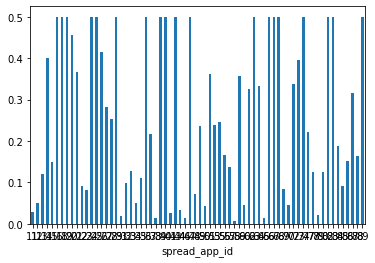

In [43]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [44]:
df.groupby(column)['label'].sum()

spread_app_id
11    1215
12     343
13    5626
14       1
15      60
      ... 
85       9
86    3552
87      12
88    1816
89       7
Name: label, Length: 68, dtype: int64

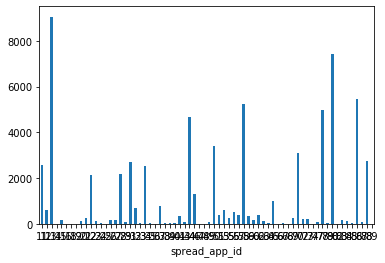

In [45]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9CB54B88>,
      dtype=object)

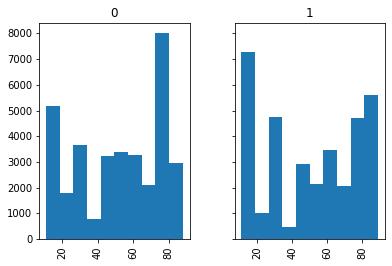

In [46]:
df.hist(column=column, by='label', sharey=True)

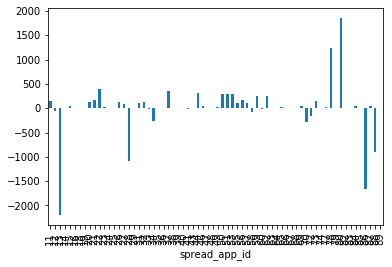

In [47]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# tags

In [48]:
column='tags'

In [49]:
#distribution
df.groupby(column).size()

tags
11     1050
12      138
13     2099
14       13
15       51
17        8
18     1685
19      172
20        7
21       18
22        5
23     5076
24      598
25      332
26      358
27      441
28      600
30      212
31       36
32      714
33       34
34       35
36       34
37    23843
38      238
39    11572
40    10546
41     8380
42      511
dtype: int64

In [50]:
df[column].unique()

array([26, 39, 28, 27, 19, 37, 41, 40, 23, 11, 13, 32, 42, 24, 18, 25, 14,
       15, 30, 38, 12, 34, 21, 36, 17, 31, 33, 20, 22], dtype=int64)

In [51]:
df.corr().abs()["label"][column]

0.0822840292986417

In [52]:
df.groupby(column)["label"].mean()

tags
11    0.314286
12    0.043478
13    0.460696
14    1.000000
15    0.627451
17    1.000000
18    0.445104
19    0.616279
20    0.000000
21    0.166667
22    1.000000
23    0.385540
24    0.162207
25    0.527108
26    0.307263
27    0.346939
28    0.261667
30    0.122642
31    0.388889
32    0.401961
33    1.000000
34    0.485714
36    1.000000
37    0.579373
38    0.134454
39    0.530073
40    0.542291
41    0.388067
42    0.334638
Name: label, dtype: float64

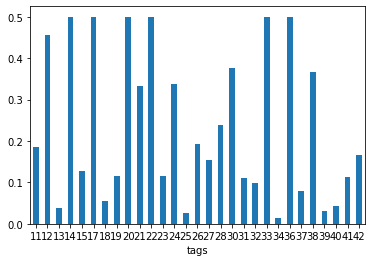

In [53]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [54]:
df.groupby(column)['label'].sum()

tags
11      330
12        6
13      967
14       13
15       32
17        8
18      750
19      106
20        0
21        3
22        5
23     1957
24       97
25      175
26      110
27      153
28      157
30       26
31       14
32      287
33       34
34       17
36       34
37    13814
38       32
39     6134
40     5719
41     3252
42      171
Name: label, dtype: int64

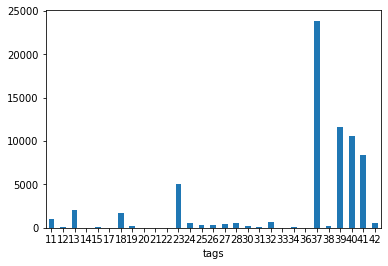

In [55]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9D0DCA48>,
      dtype=object)

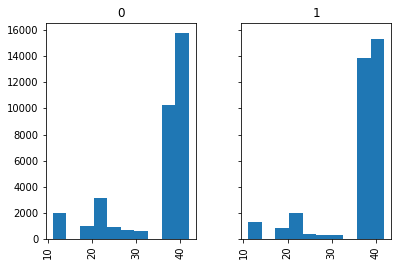

In [56]:
df.hist(column=column, by='label', sharey=True)

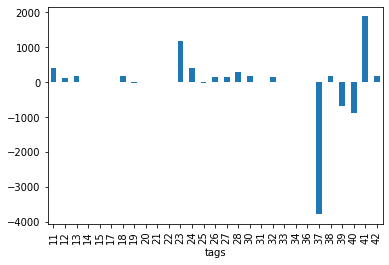

In [57]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# app_first_class

In [58]:
column='app_first_class'

In [59]:
#distribution
df.groupby(column).size()

app_first_class
2    11699
3      588
4    56519
dtype: int64

In [60]:
df[column].unique()

array([3, 4, 2], dtype=int64)

In [61]:
df.corr().abs()["label"][column]

0.13644237353461033

In [62]:
df.groupby(column)["label"].mean()

app_first_class
2    0.356868
3    0.183673
4    0.532918
Name: label, dtype: float64

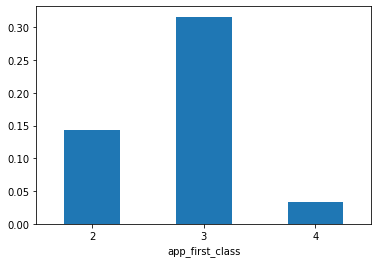

In [63]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [64]:
df.groupby(column)['label'].sum()

app_first_class
2     4175
3      108
4    30120
Name: label, dtype: int64

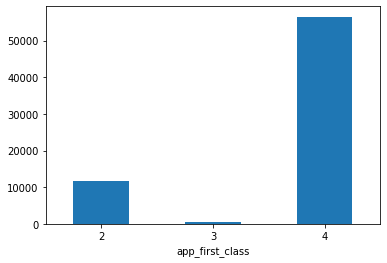

In [65]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9D3F6148>,
      dtype=object)

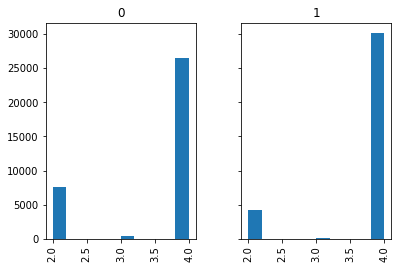

In [66]:
df.hist(column=column, by='label', sharey=True)

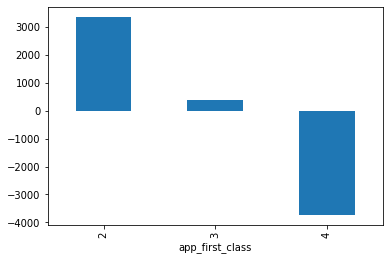

In [67]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# app_second_class

In [68]:
column='app_second_class'

In [69]:
#distribution
df.groupby(column).size()

app_second_class
11       96
12      310
13      441
14       36
15      120
16      245
17    12083
18      222
19        5
20     1050
21    24441
22      396
23     4974
24       13
25    12645
26     8398
27      600
28      332
29     2399
dtype: int64

In [70]:
df[column].unique()

array([22, 17, 27, 13, 12, 21, 26, 25, 23, 20, 29, 28, 24, 15, 18, 16, 11,
       14, 19], dtype=int64)

In [71]:
df.corr().abs()["label"][column]

0.05415061904487294

In [72]:
df.groupby(column)["label"].mean()

app_second_class
11    1.000000
12    0.361290
13    0.346939
14    0.388889
15    0.691667
16    0.130612
17    0.521807
18    0.121622
19    1.000000
20    0.314286
21    0.569167
22    0.373737
23    0.374749
24    1.000000
25    0.528747
26    0.387592
27    0.261667
28    0.527108
29    0.432263
Name: label, dtype: float64

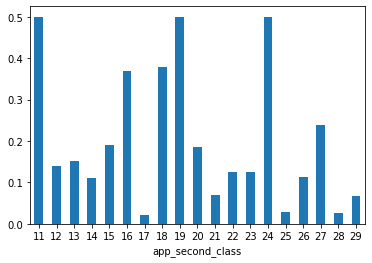

In [73]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [74]:
df.groupby(column)['label'].sum()

app_second_class
11       96
12      112
13      153
14       14
15       83
16       32
17     6305
18       27
19        5
20      330
21    13911
22      148
23     1864
24       13
25     6686
26     3255
27      157
28      175
29     1037
Name: label, dtype: int64

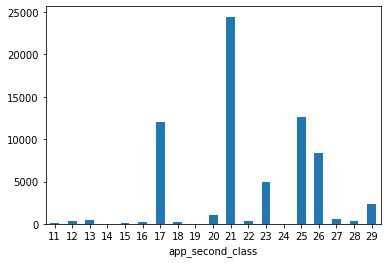

In [75]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9D5A8488>,
      dtype=object)

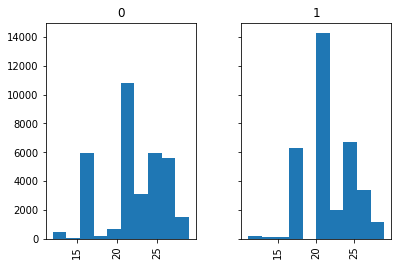

In [76]:
df.hist(column=column, by='label', sharey=True)

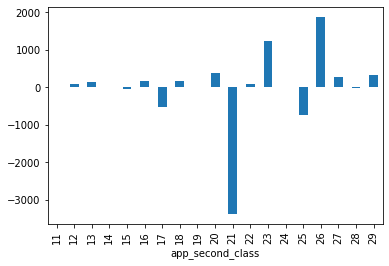

In [77]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# age

In [78]:
column='age'

In [79]:
#distribution
df.groupby(column).size()

age
-1      531
 1     5617
 2     2125
 3     2674
 4    12427
 5    16322
 6    15529
 7    13581
dtype: int64

In [80]:
df[column].unique()

array([ 4,  7,  6,  5,  2,  1,  3, -1], dtype=int64)

In [81]:
df.corr().abs()["label"][column]

0.12938077046792887

In [82]:
df.groupby(column)["label"].mean()

age
-1    0.807910
 1    0.256543
 2    0.555765
 3    0.488033
 4    0.483705
 5    0.468693
 6    0.506214
 7    0.627715
Name: label, dtype: float64

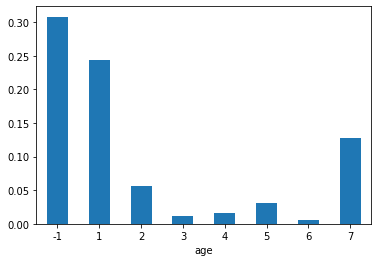

In [83]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [84]:
df.groupby(column)['label'].sum()

age
-1     429
 1    1441
 2    1181
 3    1305
 4    6011
 5    7650
 6    7861
 7    8525
Name: label, dtype: int64

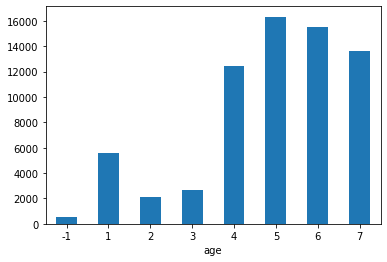

In [85]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE9D94B608>,
      dtype=object)

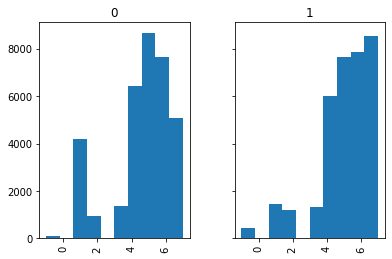

In [86]:
df.hist(column=column, by='label', sharey=True)

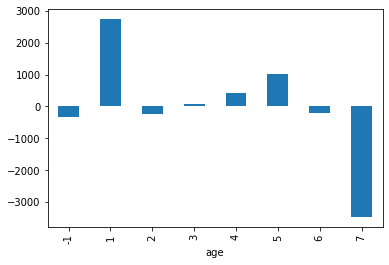

In [87]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# city_rank

In [88]:
column='city_rank'

In [89]:
#distribution
df.groupby(column).size()

city_rank
2     1087
3    33174
4    12447
5    22098
dtype: int64

In [90]:
df[column].unique()

array([4, 3, 5, 2], dtype=int64)

In [91]:
df.corr().abs()["label"][column]

0.05409891244677745

In [92]:
df.groupby(column)["label"].mean()

city_rank
2    0.669733
3    0.519292
4    0.488873
5    0.468956
Name: label, dtype: float64

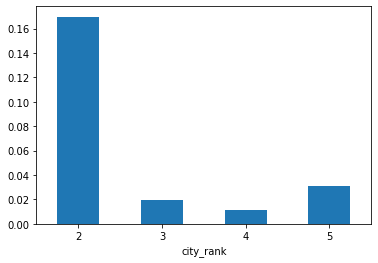

In [93]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [94]:
df.groupby(column)['label'].sum()

city_rank
2      728
3    17227
4     6085
5    10363
Name: label, dtype: int64

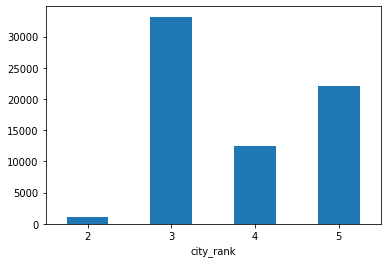

In [95]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA7041C88>,
      dtype=object)

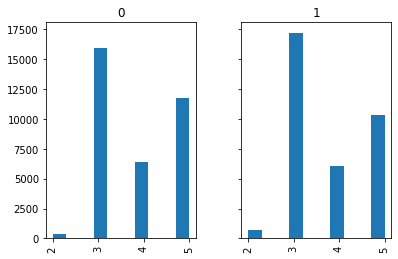

In [96]:
df.hist(column=column, by='label', sharey=True)

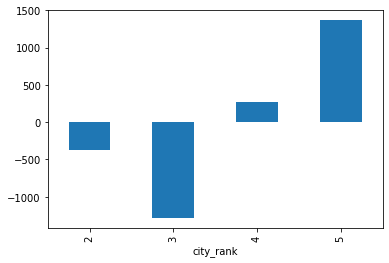

In [97]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# device_size

In [98]:
column='device_size'

In [99]:
#distribution
df.groupby(column).size()

device_size
103    181
104     36
109      2
111      1
113     50
      ... 
342     57
343      4
346      4
348      2
349     16
Length: 99, dtype: int64

In [100]:
df[column].unique()

array([220, 141, 291, 117, 193, 180, 162, 156, 316, 218, 335, 310, 200,
       290, 342, 217, 235, 103, 297, 268, 288, 262, 247, 315, 349, 216,
       191, 208, 119, 257, 253, 286, 198, 215, 287, 104, 186, 210, 176,
       150, 113, 326, 126, 337, 161, 205, 327, 209, 252, 295, 173, 241,
       313, 121, 340, 142, 343, 229, 158, 289, 280, 179, 237, 312, 128,
       177, 109, 182, 263, 207, 260, 264, 222, 248, 333, 292, 346, 255,
       175, 348, 259, 184, 234, 300, 154, 171, 143, 151, 225, 111, 341,
       303, 199, 278, 167, 256, 132, 116, 314], dtype=int64)

In [101]:
df.corr().abs()["label"][column]

0.024909828314085072

In [102]:
df.groupby(column)["label"].mean()

device_size
103    0.480663
104    0.583333
109    1.000000
111    0.000000
113    0.360000
         ...   
342    0.403509
343    0.750000
346    0.750000
348    1.000000
349    0.687500
Name: label, Length: 99, dtype: float64

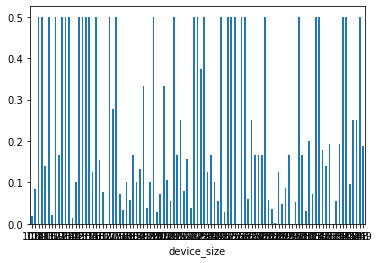

In [103]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [104]:
df.groupby(column)['label'].sum()

device_size
103    87
104    21
109     2
111     0
113    18
       ..
342    23
343     3
346     3
348     2
349    11
Name: label, Length: 99, dtype: int64

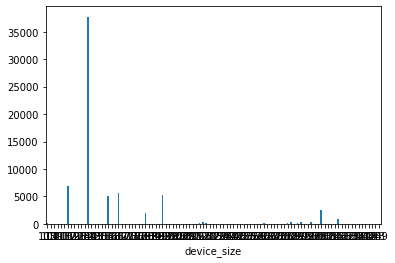

In [105]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA72095C8>,
      dtype=object)

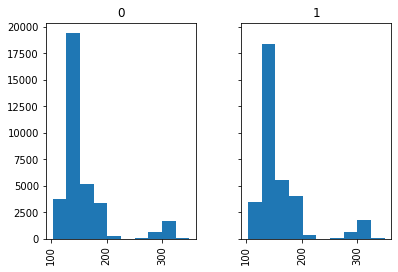

In [106]:
df.hist(column=column, by='label', sharey=True)

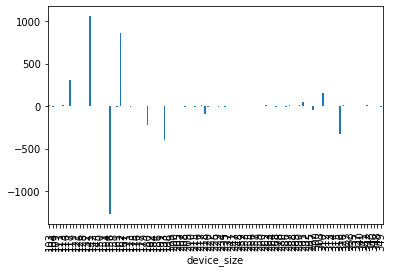

In [107]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# gender

In [108]:
column='gender'

In [109]:
#distribution
df.groupby(column).size()

gender
2    52845
3     1412
4    14549
dtype: int64

In [110]:
df[column].unique()

array([2, 4, 3], dtype=int64)

In [111]:
df.corr().abs()["label"][column]

0.025609403769690044

In [112]:
df.groupby(column)["label"].mean()

gender
2    0.489848
3    0.749292
4    0.512681
Name: label, dtype: float64

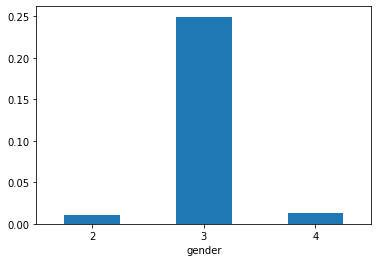

In [113]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [114]:
df.groupby(column)['label'].sum()

gender
2    25886
3     1058
4     7459
Name: label, dtype: int64

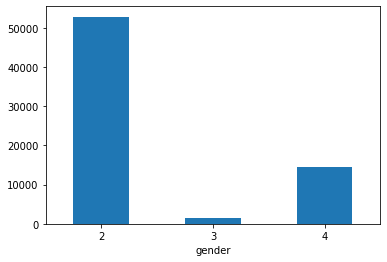

In [115]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA7AD86C8>,
      dtype=object)

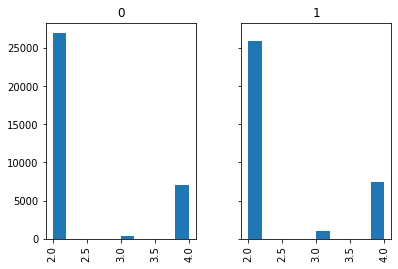

In [116]:
df.hist(column=column, by='label', sharey=True)

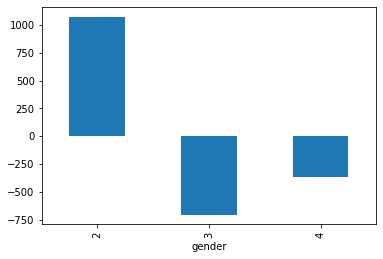

In [117]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# net_type

In [118]:
column='net_type'

In [119]:
#distribution
df.groupby(column).size()

net_type
2    55708
3    12761
4      257
5       69
6       11
dtype: int64

In [120]:
df[column].unique()

array([4, 2, 3, 6, 5], dtype=int64)

In [121]:
df.corr().abs()["label"][column]

0.03881730378349702

In [122]:
df.groupby(column)["label"].mean()

net_type
2    0.509891
3    0.457096
4    0.494163
5    0.463768
6    0.545455
Name: label, dtype: float64

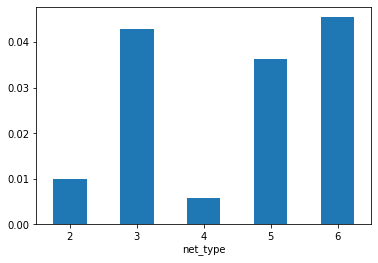

In [123]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [124]:
df.groupby(column)['label'].sum()

net_type
2    28405
3     5833
4      127
5       32
6        6
Name: label, dtype: int64

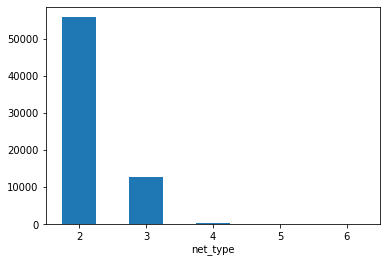

In [125]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA7C95608>,
      dtype=object)

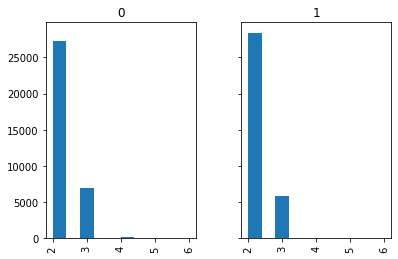

In [126]:
df.hist(column=column, by='label', sharey=True)

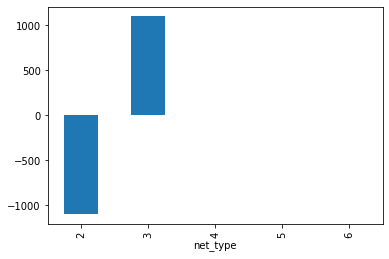

In [127]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# his_app_size

In [128]:
column='his_app_size'

In [129]:
#distribution
df.groupby(column).size()

his_app_size
-1     11699
 2      2683
 3        68
 4     15860
 5      5623
 6      9227
 7        65
 8       717
 9      4872
 10       33
 11     1151
 12       67
 13     3138
 14     6288
 15      693
 16     3137
 17     2258
 18      641
 19      292
 20      161
 21      133
dtype: int64

In [130]:
df[column].unique()

array([ 8,  2, 14,  3, -1,  4,  5, 13,  9,  6, 18, 17, 15, 19, 11, 16, 20,
       12, 21, 10,  7], dtype=int64)

In [131]:
df.corr().abs()["label"][column]

0.05566163457876398

In [132]:
df.groupby(column)["label"].mean()

his_app_size
-1     0.356868
 2     0.597838
 3     0.264706
 4     0.608764
 5     0.414547
 6     0.532242
 7     0.892308
 8     0.297071
 9     0.463259
 10    0.484848
 11    0.448306
 12    0.238806
 13    0.422243
 14    0.484574
 15    0.383838
 16    0.617150
 17    0.589903
 18    0.564743
 19    0.602740
 20    1.000000
 21    0.210526
Name: label, dtype: float64

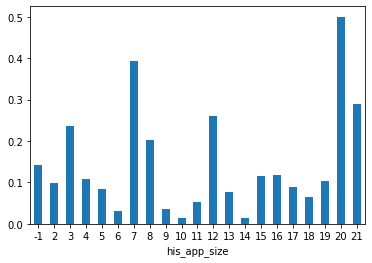

In [133]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [134]:
df.groupby(column)['label'].sum()

his_app_size
-1     4175
 2     1604
 3       18
 4     9655
 5     2331
 6     4911
 7       58
 8      213
 9     2257
 10      16
 11     516
 12      16
 13    1325
 14    3047
 15     266
 16    1936
 17    1332
 18     362
 19     176
 20     161
 21      28
Name: label, dtype: int64

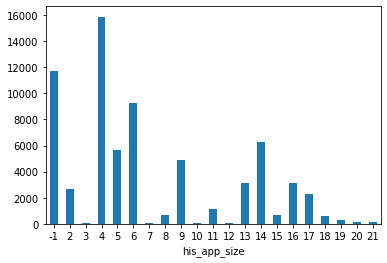

In [135]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA7F62DC8>,
      dtype=object)

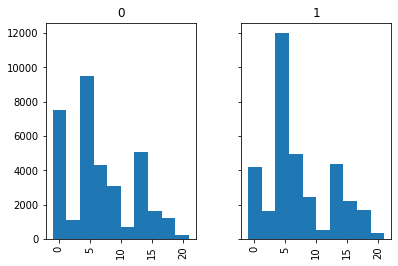

In [136]:
df.hist(column=column, by='label', sharey=True)

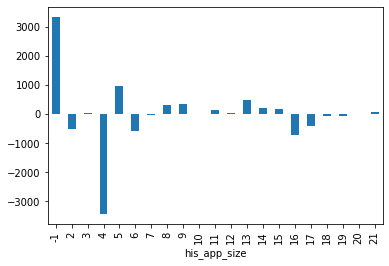

In [137]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# his_on_shelf_time

In [138]:
column='his_on_shelf_time'

In [139]:
#distribution
df.groupby(column).size()

his_on_shelf_time
-1    11699
 1       10
 2    11603
 3    45494
dtype: int64

In [140]:
df[column].unique()

array([ 3,  2, -1,  1], dtype=int64)

In [141]:
df.corr().abs()["label"][column]

0.16434468521229295

In [142]:
df.groupby(column)["label"].mean()

his_on_shelf_time
-1    0.356868
 1    0.100000
 2    0.360338
 3    0.572515
Name: label, dtype: float64

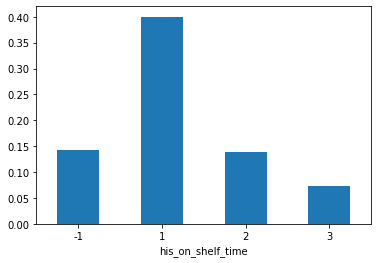

In [143]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [144]:
df.groupby(column)['label'].sum()

his_on_shelf_time
-1     4175
 1        1
 2     4181
 3    26046
Name: label, dtype: int64

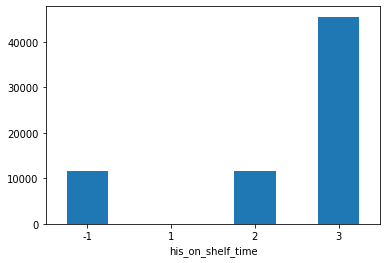

In [145]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA9236F48>,
      dtype=object)

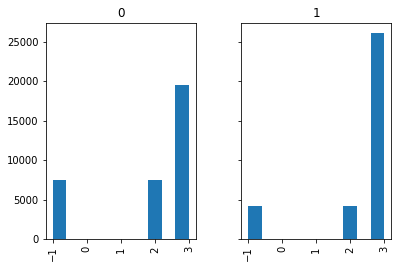

In [146]:
df.hist(column=column, by='label', sharey=True)

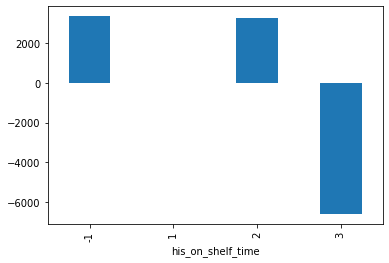

In [147]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# app_score

In [148]:
column='app_score'

In [149]:
#distribution
df.groupby(column).size()

app_score
1    11703
2    57103
dtype: int64

In [150]:
df[column].unique()

array([2, 1], dtype=int64)

In [151]:
df.corr().abs()["label"][column]

0.12939516746040694

In [152]:
df.groupby(column)["label"].mean()

app_score
1    0.357088
2    0.529289
Name: label, dtype: float64

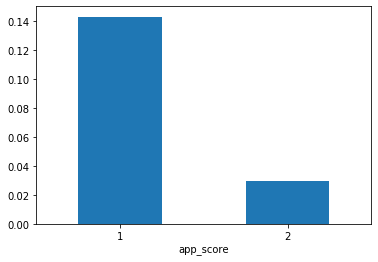

In [153]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [154]:
df.groupby(column)['label'].sum()

app_score
1     4179
2    30224
Name: label, dtype: int64

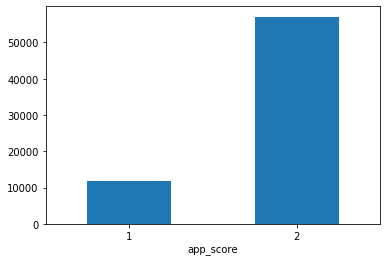

In [155]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA9450488>,
      dtype=object)

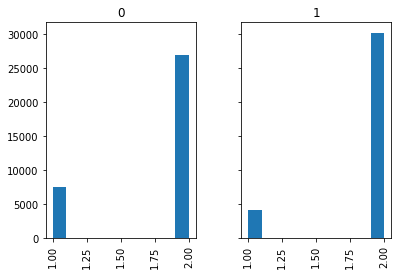

In [156]:
df.hist(column=column, by='label', sharey=True)

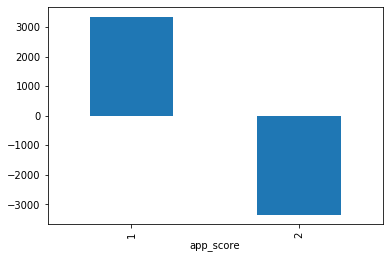

In [157]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# emui_dev

In [158]:
column='emui_dev'

In [159]:
#distribution
df.groupby(column).size()

emui_dev
11       21
12     4909
14    15074
15      193
16      148
17     1506
18       84
19     1377
20    35304
24      104
25      780
26      589
27     4714
28     4003
dtype: int64

In [160]:
df[column].unique()

array([20, 28, 12, 27, 14, 18, 19, 26, 17, 25, 24, 16, 15, 11],
      dtype=int64)

In [161]:
df.corr().abs()["label"][column]

0.02941731401560811

In [162]:
df.groupby(column)["label"].mean()

emui_dev
11    0.952381
12    0.436545
14    0.557450
15    0.575130
16    0.533784
17    0.488048
18    0.547619
19    0.467683
20    0.490029
24    0.769231
25    0.579487
26    0.466893
27    0.510182
28    0.427180
Name: label, dtype: float64

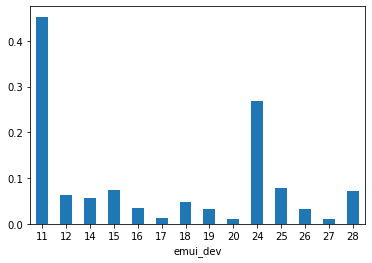

In [163]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [164]:
df.groupby(column)['label'].sum()

emui_dev
11       20
12     2143
14     8403
15      111
16       79
17      735
18       46
19      644
20    17300
24       80
25      452
26      275
27     2405
28     1710
Name: label, dtype: int64

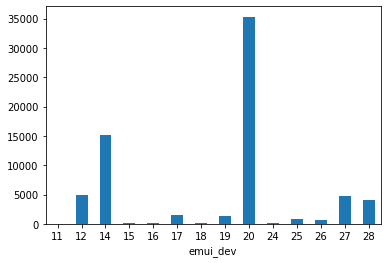

In [165]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA96AC748>,
      dtype=object)

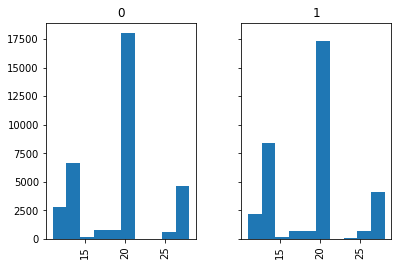

In [166]:
df.hist(column=column, by='label', sharey=True)

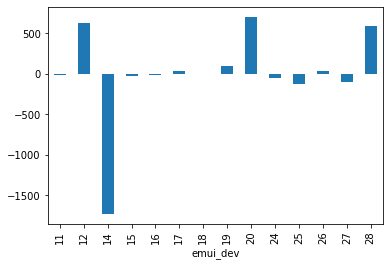

In [167]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# list_time

In [168]:
column='list_time'

In [169]:
#distribution
df.groupby(column).size()

list_time
-2        19
-1       531
 4      9459
 5      3996
 6       971
 7      4144
 8      9827
 9     11759
 10     5571
 11      164
 12     7359
 13     2976
 14     6674
 15     2365
 16      856
 17     2135
dtype: int64

In [170]:
df[column].unique()

array([12, 10,  4,  9, 14, 15,  5,  8,  7, 17, 16, 13,  6, -1, 11, -2],
      dtype=int64)

In [171]:
df.corr().abs()["label"][column]

0.04319404625879988

In [172]:
df.groupby(column)["label"].mean()

list_time
-2     0.947368
-1     0.807910
 4     0.427741
 5     0.426677
 6     0.653965
 7     0.593629
 8     0.447441
 9     0.498002
 10    0.559146
 11    0.371951
 12    0.510260
 13    0.568212
 14    0.471531
 15    0.537421
 16    0.678738
 17    0.578923
Name: label, dtype: float64

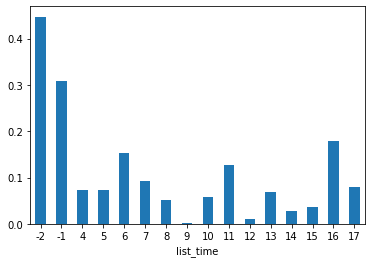

In [173]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [174]:
df.groupby(column)['label'].sum()

list_time
-2       18
-1      429
 4     4046
 5     1705
 6      635
 7     2460
 8     4397
 9     5856
 10    3115
 11      61
 12    3755
 13    1691
 14    3147
 15    1271
 16     581
 17    1236
Name: label, dtype: int64

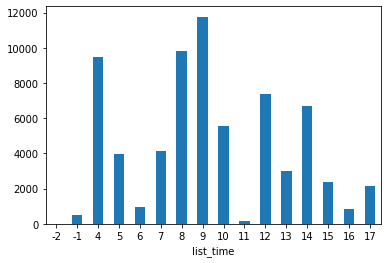

In [175]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA99893C8>,
      dtype=object)

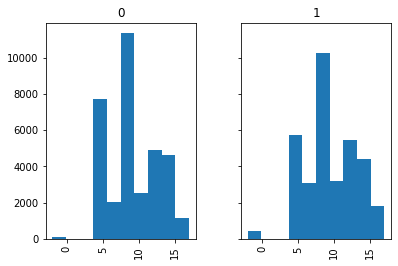

In [176]:
df.hist(column=column, by='label', sharey=True)

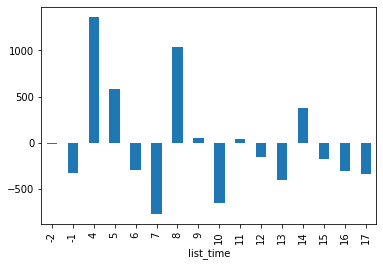

In [177]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# device_size_binned

In [178]:
column='device_size_binned'

In [179]:
#distribution
df.groupby(column).size()

device_size_binned
0    45001
1    18082
2      635
3     1475
4     3613
dtype: int64

In [180]:
df[column].unique()

array([2, 0, 3, 1, 4], dtype=int64)

In [181]:
df.corr().abs()["label"][column]

0.028277863507646762

In [182]:
df.groupby(column)["label"].mean()

device_size_binned
0    0.484900
1    0.529809
2    0.595276
3    0.496949
4    0.523388
Name: label, dtype: float64

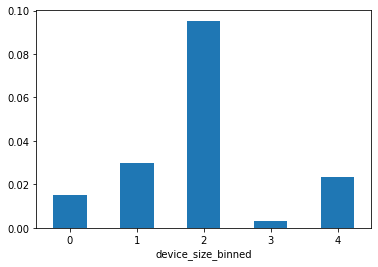

In [183]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [184]:
df.groupby(column)['label'].sum()

device_size_binned
0    21821
1     9580
2      378
3      733
4     1891
Name: label, dtype: int64

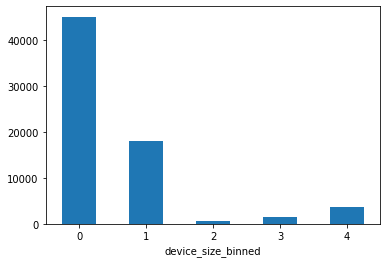

In [185]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEA9C17CC8>,
      dtype=object)

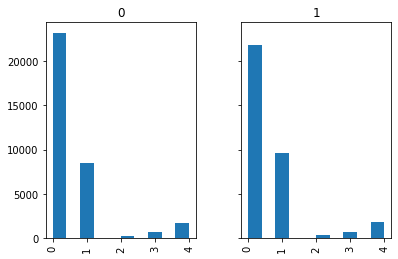

In [186]:
df.hist(column=column, by='label', sharey=True)

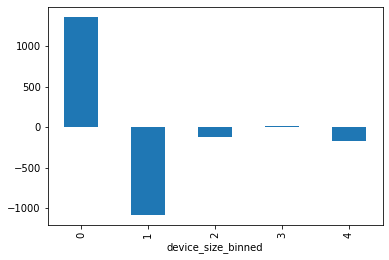

In [187]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

# emui_dev_binned

In [188]:
column='emui_dev_binned'

In [189]:
#distribution
df.groupby(column).size()

emui_dev_binned
0    20004
1     1847
2    36765
3      104
4    10086
dtype: int64

In [190]:
df[column].unique()

array([2, 4, 0, 1, 3], dtype=int64)

In [191]:
df.corr().abs()["label"][column]

0.03372467312530678

In [192]:
df.groupby(column)["label"].mean()

emui_dev_binned
0    0.528194
1    0.500812
2    0.489324
3    0.769231
4    0.480071
Name: label, dtype: float64

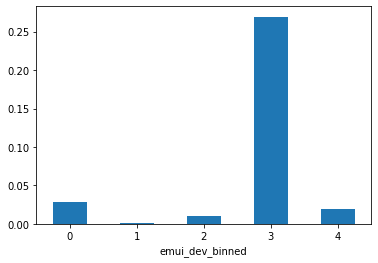

In [193]:
#Importancia del valor sobre la label.
abs(0.5-df.groupby(column)['label'].mean()).plot(kind='bar', rot=0)

In [194]:
df.groupby(column)['label'].sum()

emui_dev_binned
0    10566
1      925
2    17990
3       80
4     4842
Name: label, dtype: int64

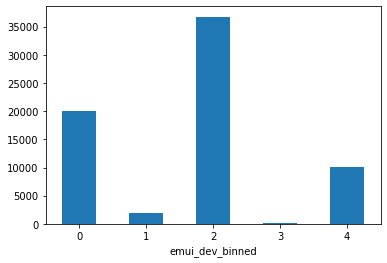

In [195]:
# Analise distributon
df.groupby(column).size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEAAE27388>,
      dtype=object)

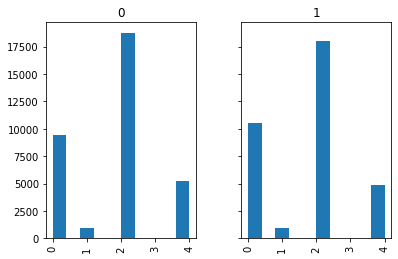

In [196]:
df.hist(column=column, by='label', sharey=True)

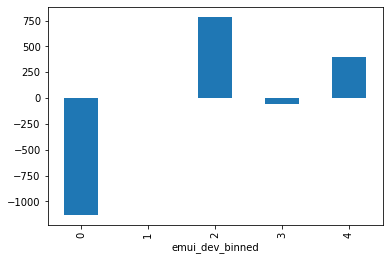

In [197]:
(df[df.label==0].groupby(column).size()-df[df.label==1].groupby(column).size()).plot(kind='bar')

In [198]:
df

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
0,0,0,2170687,4155,2618,8,174,68,5,22,55,26,3,22,4,290,4,102,220,4,2,4,45,8,3,2,20,12,4,20,1,-1,10,9,22,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,2,2,3
1,1,1,2114846,1847,6428,7,178,17,5,12,70,39,4,17,7,154,3,65,141,9,2,2,29,2,3,2,20,10,2,16,-1,-1,2,11,36,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,3
2,2,0,1409831,2946,4618,7,110,38,5,14,53,28,4,27,6,221,5,32,291,4,2,2,12,14,2,2,20,4,5,20,-1,-1,3,13,30,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,2,1
3,3,0,1343056,5148,6476,7,184,53,5,13,49,27,4,13,5,266,4,82,117,4,4,2,34,3,2,2,20,9,3,-1,-1,-1,2,11,29,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,2,2
4,4,1,1639771,1847,6428,7,178,17,5,16,70,39,4,17,4,207,5,104,141,9,2,2,32,2,3,2,20,14,5,12,-1,-1,2,11,36,7,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68801,68801,0,1365015,1704,2184,7,128,60,4,12,51,42,2,17,4,110,5,35,117,5,2,3,20,-1,-1,1,20,15,3,18,-1,-1,2,10,25,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,4
68802,68802,1,1815999,2389,5768,7,177,56,5,13,31,40,4,25,4,194,3,54,141,9,2,2,42,13,3,2,12,9,3,-1,-1,-1,2,12,17,6,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
68803,68803,0,1971810,1471,6236,7,156,56,5,16,58,37,4,21,4,116,3,29,141,4,2,2,38,14,3,2,14,9,3,-1,-1,-1,2,11,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,2
68804,68804,0,1479577,3251,4549,7,177,56,5,17,31,40,4,25,5,120,3,91,310,4,2,2,46,13,3,2,27,14,5,20,1,-1,2,10,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,4,4,4


# creat_type_cd

In [199]:
#distribution
df.groupby('creat_type_cd').size()

creat_type_cd
2      334
3     6499
4     1102
5      973
6     7614
7    49091
8     2964
9      229
dtype: int64

In [200]:
df['creat_type_cd'].unique()

array([8, 7, 6, 3, 4, 9, 5, 2], dtype=int64)

In [201]:
df.corr().abs()["label"]["creat_type_cd"]

0.03872744671433442

In [202]:
df.groupby('creat_type_cd')["label"].mean()

creat_type_cd
2    0.511976
3    0.456686
4    0.228675
5    0.413155
6    0.482401
7    0.527103
8    0.328947
9    0.375546
Name: label, dtype: float64

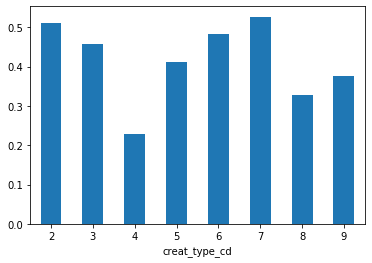

In [203]:
df.groupby('creat_type_cd')['label'].mean().plot(kind='bar', rot=0)

In [204]:
df.groupby('creat_type_cd')['label'].sum()

creat_type_cd
2      171
3     2968
4      252
5      402
6     3673
7    25876
8      975
9       86
Name: label, dtype: int64

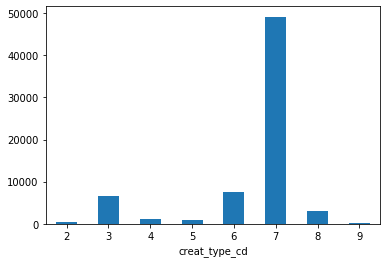

In [205]:
# Analise distributon
df.groupby('creat_type_cd').size().plot(kind='bar', rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEAB06A848>,
      dtype=object)

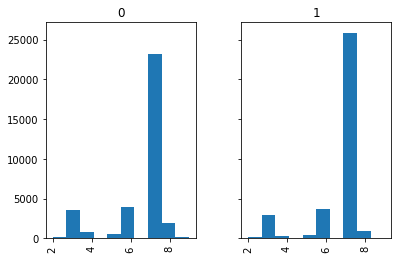

In [206]:
df.hist(column='creat_type_cd', by='label', sharey=True)

In [207]:
df.columns


Index(['Unnamed: 0', 'label', 'uid', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id',
       'tags', 'app_first_class', 'app_second_class', 'age', 'city',
       'city_rank', 'device_name', 'device_size', 'career', 'gender',
       'net_type', 'residence', 'his_app_size', 'his_on_shelf_time',
       'app_score', 'emui_dev', 'list_time', 'device_price',
       'up_life_duration', 'up_membership_grade', 'membership_life_duration',
       'consume_purchase', 'communication_avgonline_30d', 'indu_name', 'pt_d',
       '-1', '0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9',
       'device_size_binned', 'emui_dev_binned', 'list_time_binned'],
      dtype='object')

In [208]:
df_sort=df.sort_values('adv_id')
df_sort

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
12656,12656,0,2113508,3537,1004,8,142,60,5,17,80,41,2,26,5,207,5,76,156,4,4,3,32,-1,-1,1,14,6,1,-1,-1,-1,2,12,42,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2
15305,15305,0,1499811,3537,1004,8,142,60,5,17,80,41,2,26,7,169,3,26,156,9,4,3,14,-1,-1,1,14,12,1,-1,-1,-1,2,11,42,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,3
60309,60309,0,1306058,5732,1005,7,108,26,5,14,27,41,4,26,5,357,4,32,141,4,4,2,13,11,2,2,20,4,5,20,-1,-1,2,10,12,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,1
40978,40978,1,1562851,1537,1007,7,110,38,5,16,53,28,4,27,7,186,5,45,141,9,2,2,39,14,3,2,20,8,5,-1,-1,-1,2,11,30,6,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,2
39858,39858,1,1800489,1946,1008,7,142,36,5,12,80,41,4,26,3,154,3,65,141,2,2,3,29,5,3,2,14,10,2,18,-1,-1,2,9,42,4,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21928,21928,1,1598963,1677,7016,7,167,37,5,21,44,40,4,25,1,207,5,84,141,9,2,2,32,9,3,2,20,9,2,14,-1,-1,2,11,17,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,2
63939,63939,1,1422937,1677,7016,7,167,37,5,17,44,40,4,25,6,437,5,69,310,9,2,2,28,9,3,2,20,12,5,20,1,-1,2,10,17,2,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,3
57873,57873,0,1153427,1677,7016,7,167,37,5,17,44,40,4,25,5,231,5,91,310,4,2,2,20,9,3,2,20,14,5,18,-1,-1,2,12,17,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,4
24292,24292,1,1744010,2175,7018,7,125,37,4,17,44,40,4,25,6,297,3,45,141,4,2,3,37,9,3,2,14,8,5,18,-1,-1,2,11,17,3,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,2


In [209]:
df_sort.iloc[0:50]

,Unnamed: 0,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,-1,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,device_size_binned,emui_dev_binned,list_time_binned
12656,12656,0,2113508,3537,1004,8,142,60,5,17,80,41,2,26,5,207,5,76,156,4,4,3,32,-1,-1,1,14,6,1,-1,-1,-1,2,12,42,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2
15305,15305,0,1499811,3537,1004,8,142,60,5,17,80,41,2,26,7,169,3,26,156,9,4,3,14,-1,-1,1,14,12,1,-1,-1,-1,2,11,42,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,3
60309,60309,0,1306058,5732,1005,7,108,26,5,14,27,41,4,26,5,357,4,32,141,4,4,2,13,11,2,2,20,4,5,20,-1,-1,2,10,12,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,1
40978,40978,1,1562851,1537,1007,7,110,38,5,16,53,28,4,27,7,186,5,45,141,9,2,2,39,14,3,2,20,8,5,-1,-1,-1,2,11,30,6,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,2,2
39858,39858,1,1800489,1946,1008,7,142,36,5,12,80,41,4,26,3,154,3,65,141,2,2,3,29,5,3,2,14,10,2,18,-1,-1,2,9,42,4,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,3
53932,53932,0,2072959,2107,1009,3,142,60,5,12,80,41,2,26,1,240,5,29,141,9,4,2,35,-1,-1,1,20,9,3,-1,-1,-1,2,10,42,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,2,2
59153,59153,1,1429183,2857,1012,7,142,60,5,17,80,41,2,26,4,207,5,91,310,4,2,3,32,-1,-1,1,20,14,5,18,-1,-1,7,11,24,3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,4
30582,30582,1,1665368,2857,1012,7,142,60,5,11,80,41,2,26,6,224,3,56,141,9,2,2,12,-1,-1,1,20,8,4,18,-1,-1,2,12,24,3,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2,2
13681,13681,1,2142042,2857,1012,7,142,60,5,17,80,41,2,26,4,121,3,102,141,3,2,3,34,-1,-1,1,20,12,4,20,1,-1,2,8,24,3,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,2,3
48888,48888,1,2107626,2857,1012,7,142,60,5,16,80,41,2,26,4,303,5,56,141,4,2,3,46,-1,-1,1,20,8,4,20,-1,-1,2,12,24,3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2,2


In [210]:
df_sort.to_csv("dfsgbfediu.csv")

In [211]:
#Path where the database is
path="../dataset/train_data.csv"

#reading the database
d2f=pd.read_csv(path, delimiter='|',nrows=1000)
d2f

FileNotFoundError: [Errno 2] File ../dataset/train_data.csv does not exist: '../dataset/train_data.csv'

In [ ]:
len(d2f["adv_id"].unique())

In [ ]:
len(d2f["task_id"].unique())

In [ ]:
d2f.sort_values('adv_id')

In [ ]:
len(d2f["dev_id"].unique())

In [ ]:
for column in d2f:
    print(column )
    print(len(d2f[column].unique()))

In [ ]:
df.corr()


In [ ]:
def analisis_extendido():
    df2=df.drop(['Unnamed: 0','label','uid', 'task_id','adv_id',], axis=1)
    columns= df2.columns
    for column in columns:
        print ("# ANALISIS OF {}".format(column))
        #distribution
        print(df.groupby(column).size())
        print(df.groupby(column).size().plot(kind='bar', rot=0))
        df[column].unique()
        df.corr().abs()["label"][column]
        df.groupby(column)["label"].mean()
        df.groupby(column)['label'].mean().plot(kind='bar', rot=0)
        df.groupby(column)['label'].sum()
        df.hist(column=column, by='label', sharey=True)